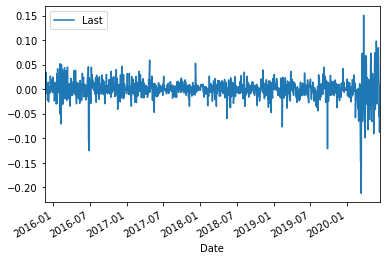

In [1]:
%matplotlib inline
import quandl

QUANDL_API_KEY = '1yYHfzzuFshPzyQMsksg'
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN.4')
daily_changes = df.pct_change(periods=1)
daily_changes.plot();

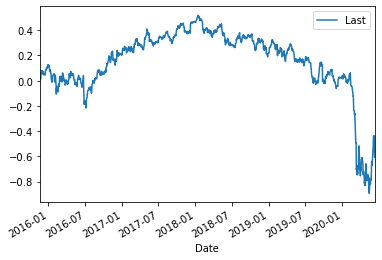

In [3]:
df_cumsum = daily_changes.cumsum()
df_cumsum.plot();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0D682B10>]],
      dtype=object)

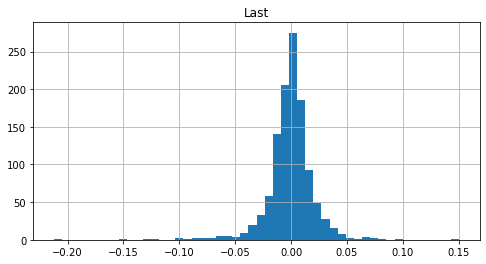

In [7]:
daily_changes.hist(bins=50, figsize=(8, 4))

In [8]:
daily_changes.describe()

,Last
count,1160.000000
mean,-0.000517
std,0.021545
min,-0.212453
25%,-0.009087
50%,0.000317
75%,0.009100
max,0.150552


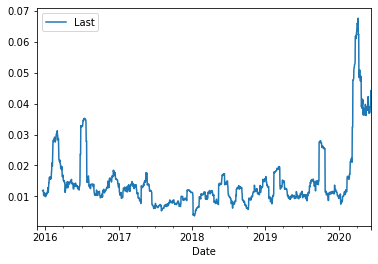

In [14]:
df_filled = df.asfreq('D', method='ffill')
df_returns = df_filled.pct_change()
df.std = df_returns.rolling(window=30, min_periods=30).std()
df.std.plot();

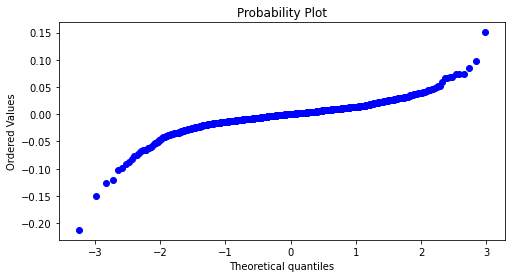

In [18]:
from scipy import stats
from scipy.stats import probplot
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(8,4))
ax = figure.add_subplot(111)
stats.probplot(daily_changes['Last'], dist='norm', plot=ax)
plt.show();